# Installation of OpenCV

## 1. Create a virtual environment

```
mkvirtualenv cv3 -p python3
```

## 2. Install OpenCV

### 2.1. Compilation pre-requisites

#### Mac OS X

```
brew install cmake pkg-config
brew install jpeg libpng libtiff openexr
brew install eigen tbb
brew install python3
```

### 2.2. Download OpenCV

```
cd ~
git clone https://github.com/Itseez/opencv.git
cd opencv
git checkout 3.1.0
cd ~
git clone https://github.com/Itseez/opencv_contrib
cd opencv_contrib
git checkout 3.1.0
```

### 2.3. Compile OpenCV

#### All Unix derivatives

```
cd ~/opencv
mkdir build
cd build
```

#### Mac OS X

```
cmake -D CMAKE_BUILD_TYPE=RELEASE \
	-D CMAKE_INSTALL_PREFIX=/usr/local \
	-D PYTHON3_PACKAGES_PATH=~/.virtualenvs/cv3/lib/python3.4/site-packages \
	-D PYTHON3_LIBRARY=/usr/local/Cellar/python3/3.5.2_2/Frameworks/Python.framework/Versions/3.5/lib/libpython3.5m.dylib \
	-D PYTHON3_INCLUDE_DIR=/usr/local/Cellar/python3/3.5.2_2/Frameworks/Python.framework/Versions/3.5/include/python3.5m \
	-D INSTALL_C_EXAMPLES=OFF \
	-D INSTALL_PYTHON_EXAMPLES=ON \
	-D BUILD_EXAMPLES=ON \
	-D BUILD_opencv_python3=ON \
	-D OPENCV_EXTRA_MODULES_PATH=~/opencv_contrib/modules ..
    
num_cores=`sysctl -n hw.ncpu`

brew -v install opencv3 --HEAD --with-python3
ln -s /usr/local/Cellar/opencv3/HEAD-b38d29b_4/lib/python3.5/site-packages/cv2.cpython-35m-darwin.so /Users/vruiz/.virtualenvs/cv3/lib/python3.5/site-packages/cv2.so
```

#### All Unix derivatives

```
make -j$num_cores
```

## 3. Display a remote image

In [1]:
import cv2
import numpy as np
import urllib.request

HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
RGB = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
cv2.imshow('lena',RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

In [11]:
# quit()

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import urllib.request

HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
RGB = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
plt.imshow(RGB)

ModuleNotFoundError: No module named 'cv2'

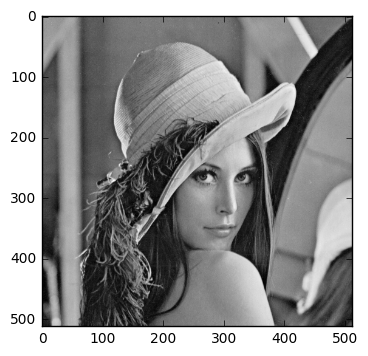

In [50]:
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
plt.imshow(Y, cmap='gray')

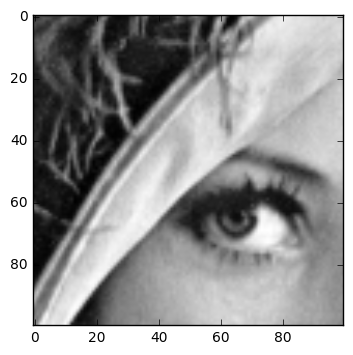

In [51]:
template = Y[200:300,200:300]
w, h = template.shape
plt.imshow(template, cmap="gray")

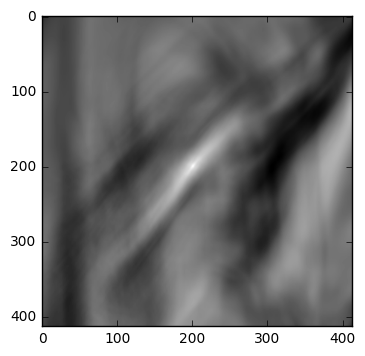

In [55]:
res = cv2.matchTemplate(Y, template, cv2.TM_CCOEFF)
plt.imshow(res, cmap="gray")

In [52]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

(300, 300)


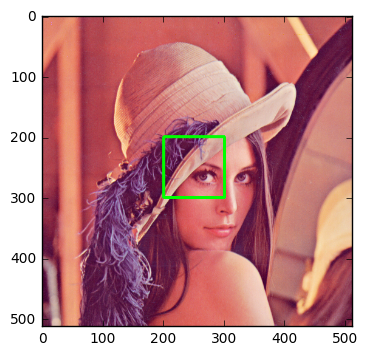

In [53]:
print(bottom_right)
cv2.rectangle(RGB, top_left, bottom_right, (0,255,0), 3)
plt.imshow(RGB, cmap="gray")

## [Capture video](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html)

In [56]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:7456: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor
